In [13]:
#This is the code to create a predictive model for future demand.
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
from random import random
plt.style.use('fivethirtyeight')

#https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

In [15]:
data = pd.read_csv('Demand_Data2.csv', low_memory=False)
data.head

<bound method NDFrame.head of           time_block  Unnamed: 0  pickup_zip  passenger_count  \
0      2016/01/01 00         1.0     10001.0             2908   
1      2016/01/01 00         2.0     10002.0             2140   
2      2016/01/01 00         3.0     10003.0             3106   
3      2016/01/01 00         4.0     10004.0               18   
4      2016/01/01 00         5.0     10005.0              236   
5      2016/01/01 00         6.0     10006.0              176   
6      2016/01/01 00         7.0     10007.0              318   
7      2016/01/01 00         8.0     10009.0             1662   
8      2016/01/01 00         9.0     10011.0             3410   
9      2016/01/01 00        10.0     10012.0             1986   
10     2016/01/01 00        11.0     10013.0              490   
11     2016/01/01 00        12.0     10014.0             1276   
12     2016/01/01 00        13.0     10016.0              860   
13     2016/01/01 00        14.0     10017.0             150

In [75]:
#Test Block
passengers10001 = data[data.pickup_zip == 10001.0]
passengers10001 = passengers10001.passenger_count
passengers10001 = [int(i) for i in passengers10001]

passengers10002 = data[data.pickup_zip == 10002.0]
passengers10002 = passengers10002.passenger_count
passengers10002 = [int(i) for i in passengers10002]

passengers10003 = data[data.pickup_zip == 10003.0]
passengers10003 = passengers10003.passenger_count
passengers10003 = [int(i) for i in passengers10003]


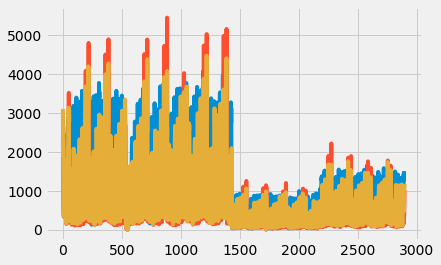

In [76]:
plt.plot(passengers10001)
plt.plot(passengers10002)
plt.plot(passengers10003)

In [144]:
#LSTM
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# fix random seed for reproducibility
numpy.random.seed(7)



In [206]:
zip = 10001

In [213]:

dataframe = pandas.read_csv('Demand_Data2.csv', usecols=[3], engine='python', skipfooter=3)
print(dataframe)
d = dataframe.values
min(d)

       passenger_count
0                 2908
1                 2140
2                 3106
3                   18
4                  236
5                  176
6                  318
7                 1662
8                 3410
9                 1986
10                 490
11                1276
12                 860
13                1506
14                1576
15                1646
16                 234
17                2340
18                1056
19                2030
20                   6
21                 788
22                2322
23                 132
24                2934
25                2610
26                2494
27                  14
28                 360
29                 278
...                ...
68347              774
68348              366
68349              531
68350              352
68351              558
68352                4
68353              159
68354              515
68355               57
68356             1510
68357             1016
68358      

array([1])

In [172]:
dataframe = pandas.read_csv('Demand_Data2.csv', usecols=[3], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
dataset = dataset[0:24*100]

In [173]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [174]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train = dataset[0:train_size,:]
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

1608 792


In [175]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [176]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [177]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [178]:
# create and fit the LSTM network
model = Sequential()
#model.add(LSTM(1, input_shape=(1, look_back)))
model.add(LSTM(4))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 4s - loss: 0.0383
Epoch 2/100
 - 3s - loss: 0.0353
Epoch 3/100
 - 3s - loss: 0.0352
Epoch 4/100
 - 3s - loss: 0.0352
Epoch 5/100
 - 3s - loss: 0.0349
Epoch 6/100
 - 3s - loss: 0.0350
Epoch 7/100
 - 3s - loss: 0.0351
Epoch 8/100
 - 3s - loss: 0.0350
Epoch 9/100
 - 3s - loss: 0.0351
Epoch 10/100
 - 3s - loss: 0.0350
Epoch 11/100
 - 3s - loss: 0.0350
Epoch 12/100
 - 3s - loss: 0.0350
Epoch 13/100
 - 3s - loss: 0.0350
Epoch 14/100
 - 3s - loss: 0.0350
Epoch 15/100
 - 3s - loss: 0.0351
Epoch 16/100
 - 3s - loss: 0.0350
Epoch 17/100
 - 3s - loss: 0.0350
Epoch 18/100
 - 3s - loss: 0.0350
Epoch 19/100
 - 3s - loss: 0.0351
Epoch 20/100
 - 3s - loss: 0.0350
Epoch 21/100
 - 3s - loss: 0.0349
Epoch 22/100
 - 3s - loss: 0.0350
Epoch 23/100
 - 3s - loss: 0.0350
Epoch 24/100
 - 3s - loss: 0.0350
Epoch 25/100
 - 3s - loss: 0.0350
Epoch 26/100
 - 3s - loss: 0.0351
Epoch 27/100
 - 3s - loss: 0.0350
Epoch 28/100
 - 3s - loss: 0.0350
Epoch 29/100
 - 3s - loss: 0.0349
Epoch 30/100
 - 3s - lo

In [179]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
 #invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 633.97 RMSE
Test Score: 559.56 RMSE


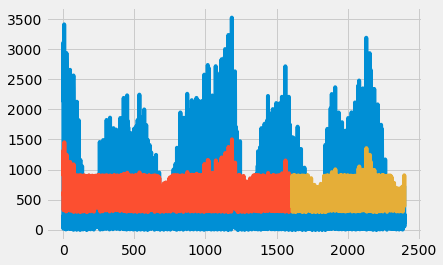

In [180]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

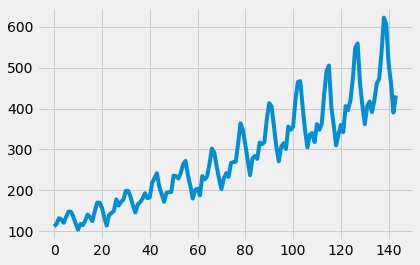

In [115]:
dataset = pandas.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
plt.plot(dataset)
plt.show()

In [103]:
dataframe = pandas.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
print(dataframe)
print(type(dataframe))
dataset = dataframe.values
dataset = dataset.astype('float32')
print(type(dataset))


     International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0                                                  112                             
1                                                  118                             
2                                                  132                             
3                                                  129                             
4                                                  121                             
5                                                  135                             
6                                                  148                             
7                                                  148                             
8                                                  136                             
9                                                  119                             
10                                                 104                      

In [84]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [85]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [86]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [87]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [88]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [89]:
# create and fit the LSTM network
model = Sequential()
#model.add(LSTM(1, input_shape=(1, look_back)))
model.add(LSTM(4))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 1s - loss: 0.0414
Epoch 2/100
 - 0s - loss: 0.0202
Epoch 3/100
 - 0s - loss: 0.0146
Epoch 4/100
 - 0s - loss: 0.0131
Epoch 5/100
 - 0s - loss: 0.0121
Epoch 6/100
 - 0s - loss: 0.0111
Epoch 7/100
 - 0s - loss: 0.0102
Epoch 8/100
 - 0s - loss: 0.0093
Epoch 9/100
 - 0s - loss: 0.0081
Epoch 10/100
 - 0s - loss: 0.0071
Epoch 11/100
 - 0s - loss: 0.0062
Epoch 12/100
 - 0s - loss: 0.0053
Epoch 13/100
 - 0s - loss: 0.0045
Epoch 14/100
 - 0s - loss: 0.0038
Epoch 15/100
 - 0s - loss: 0.0033
Epoch 16/100
 - 0s - loss: 0.0029
Epoch 17/100
 - 0s - loss: 0.0026
Epoch 18/100
 - 0s - loss: 0.0024
Epoch 19/100
 - 0s - loss: 0.0022
Epoch 20/100
 - 0s - loss: 0.0022
Epoch 21/100
 - 0s - loss: 0.0021
Epoch 22/100
 - 0s - loss: 0.0021
Epoch 23/100
 - 0s - loss: 0.0021
Epoch 24/100
 - 0s - loss: 0.0021
Epoch 25/100
 - 0s - loss: 0.0020
Epoch 26/100
 - 0s - loss: 0.0021
Epoch 27/100
 - 0s - loss: 0.0020
Epoch 28/100
 - 0s - loss: 0.0020
Epoch 29/100
 - 0s - loss: 0.0020
Epoch 30/100
 - 0s - lo

In [92]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
 #invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

ValueError: Found array with dim 3. Estimator expected <= 2.

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)